## Jean-Eudes Rouffiac  

&nbsp;

&nbsp;

# <center> TP 1 : Décision Bayésienne - Régression logistique </center>

L'objectif de ce TP est triple : 
* mettre en oeuvre les méthodes LDA et QDA
* mettre en oeuvre la méthode de régression logistique
* tester sur des problèmes de classification binaire et multi-classe

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

# 1 Analyse discriminante linéaire et quadratique



&nbsp;

## 1.1 Prise en main

&nbsp;

<p style="text-align:justify;"> Dans un premier temps, nous allons expliquer les différentes étapes du script *SimpleLDA_QDA.py*. 
Les lignes ci-dessous permettent de charger le dataset Iris, de stocker dans deux variables X et Y les données des 4 variables explicatives ainsi que la classe correspondante.
On stocke aussi dans les variables "classes" et "nbpoints" le nom de la classe ainsi que le nombre de points qu'elle contient. On affiche alors toutes ces informations.</p>

In [192]:
iris = datasets.load_iris()
X, Y = iris.data, iris.target
print('Nombre de points : {}'.format(X.shape[0]))
print('Nombre de variables : {}'.format(X.shape[1]))
print('Nombre de classes : {}'.format(len(np.unique(Y))))
classes, nbpoints = np.unique(Y, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))

Nombre de points : 150
Nombre de variables : 4
Nombre de classes : 3
Classe 0 comprend 50 points
Classe 1 comprend 50 points
Classe 2 comprend 50 points


&nbsp;

<p style="text-align:justify;"> On va maintenant tester deux méthodes qui permettent de prédire la classe d'appartenance d'un individu à une classe à partir de ses variables explicatives. Ces méthodes sont LDA (linear discriminant analysis) et QDA (quadractic discriminant analysis). Les fonctions *LinearDiscriminantAnalysis* et *QuadraticDiscrminnantAnalysis* de la librairie *Scikit-Learn* sont utilisées. 
Dans un premier temps, le modèle est appelé. Notons que pour les deux méthodes, nous souhaitons que les matrices de covariance soient calculées pour pouvoir les afficher prochainement. Donc le paramètre "store_covariance" est fixé à true car par défaut les matrices de covariances ne sont pas calculées. Pour la LDA, le solver utilisé est "svd" qui est la décomposition en valeur singulière. Les modèles sont alors entraînées avec les données X et les classes correspondantes Y. Une fois les modèles entrainés, on passe aux modèles les données X puis on compare les classes prédites avec la vraie valeur des classes. Le score est alors affiché.</p>

In [193]:
# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(X, Y)
Y_lda = clf_lda.predict(X)
err_lda = sum(Y_lda != Y)/Y.size
print('LDA : taux d''erreur = {}%'.format(100*err_lda))

# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(X, Y)
#print(clf_qda.means_)
Y_qda = clf_qda.predict(X)
err_qda = sum(Y_qda!= Y)/Y.size
print('QDA : taux d''erreur = {}%'.format(100*err_qda))

LDA : taux derreur = 2.0%
QDA : taux derreur = 2.0%


&nbsp;

<p style="text-align:justify;"> Pour les deux méthodes, le score obtenu est de 2%.</p>

&nbsp;

<p style="text-align:justify;"> On affiche maintenant les centres et matrices de covariances de la LDA et QDA.</p>

In [194]:
# Parametres estimes par LDA
print(clf_lda.means_)
print(clf_lda.covariance_)
# Parametres estimes par QDA
print(clf_qda.means_)
print(clf_qda.covariance_)

[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
[[0.259708   0.09122    0.16409333 0.037704  ]
 [0.09122    0.11356667 0.05413333 0.03275467]
 [0.16409333 0.05413333 0.18146667 0.04169067]
 [0.037704   0.03275467 0.04169067 0.04117067]]
[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
[array([[0.12424898, 0.10029796, 0.01613878, 0.01054694],
       [0.10029796, 0.14517959, 0.01168163, 0.01143673],
       [0.01613878, 0.01168163, 0.03010612, 0.00569796],
       [0.01054694, 0.01143673, 0.00569796, 0.01149388]]), array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
       [0.08518367, 0.09846939, 0.08265306, 0.04120408],
       [0.18289796, 0.08265306, 0.22081633, 0.07310204],
       [0.05577959, 0.04120408, 0.07310204, 0.03910612]]), array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
       [0.09376327, 0.10400408, 0.07137959, 0.04762857],
       [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
       [0.04909

&nbsp;

<p style="text-align:justify;"> On a affiché les moyennes de chaque variable caractéristique par classe. On constate que les variables 3 et 4 sont plus disciminantes ques les deux premières. 
On observe aussi qu'une seule matrice de covariance est affichée pour la LDA contre 3 pour la QDA. Ce résultat est logique car dans le cadre de la LDA, on fait l'hypothèse que la matrice de covariance est la même pour chaque classe.</p>

&nbsp;

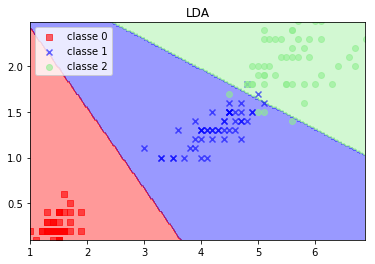

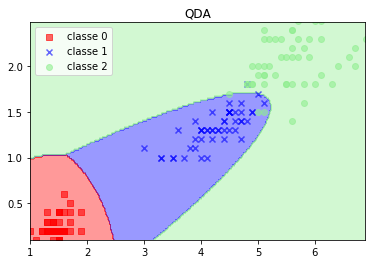

In [195]:
def plot_regions_decision_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)
    
    
#%% ### Trace de la frontiere de decision en 2D
# Utilisation de 2 variables choisies parmi les 4. 
#On fait le modele LDA et QDA que pour ces variables

variables = [2, 3]

## on ne fait ceci que pour le trace de la frontiere de decision de la LDA et QDA en 2D
#classifieur = 'LDA'

clf_lda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_lda, 0.02, titre='LDA')


clf_qda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_qda, 0.02, titre='QDA')

&nbsp;

<p style="text-align:justify;"> Dans un premier temps, on observe que les deux modèles classifient plutôt bien les données. Ensuite, on observe bien la différence entre la LDA et la QDA car les données sont séparées linéairement pour la LDA, alors que pour la QDA on observe bien le côté quadratique.</p>

&nbsp;



&nbsp;

## 1.2 Classification binaire

&nbsp;

<p style="text-align:justify;"> Dans cette partie nous allons nous intéresser au data set "Cardiotocography". Il est composé de 2126 données et 23 attributs. La variable à prédire est la variable "NSP" qui prend 3 valeurs : N=normal, S=suspect, et P=pathologic.</p>

&nbsp;

In [196]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV", "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values

Classe 1 contient 1655 points
Classe 2 contient 295 points
Classe 3 contient 176 points


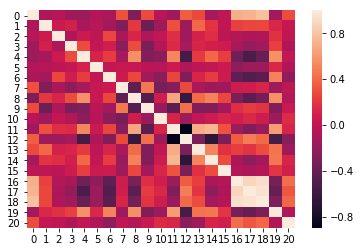

In [72]:
uniqLabels, counts = np.unique(Y, return_counts=True)
for i, lab in enumerate(uniqLabels):
    print( "Classe {} contient {} points".format(lab, counts[i]))
corr_mat = np.corrcoef(X.T)
sb.heatmap(corr_mat)

&nbsp;

<p style="text-align:justify;"> On remarque une grande disparité dans les trois classes puisque la classe 1 est représentée 1655 fois contre 295 pour la classe 2 et 176 pour la classe 3.
La matrice de corrélation indique que certaines variables sont très corrélées, comme les variables "Mean", "Median" ainsi que "Mode".</p>

&nbsp;

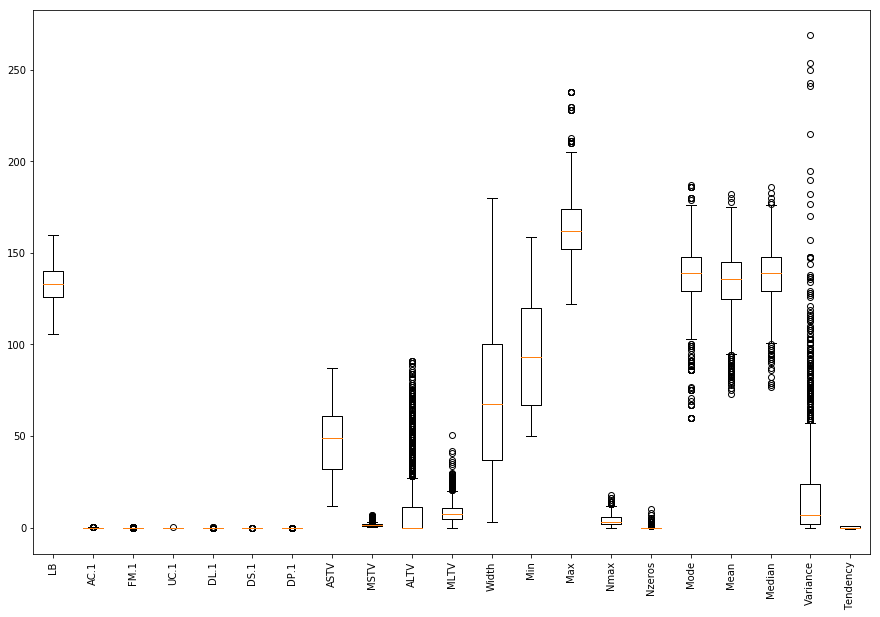

In [73]:
plt.figure(figsize=(15, 10))
box = plt.boxplot(X)
box = plt.xticks([i + 1 for i in range(0,21)], variables, rotation='vertical')

&nbsp;

<p style="text-align:justify;"> L'affichage des boxplots nous permet de voir que les variables n'ont pas toutes le même ordre de grandeur. Certaines vairables prennent des valeurs allant jusqu'à plus de 250 alors que certaines ont pour grandeur maximale 10. Pour pallier ce problème, les variables doivent donc être normalisées.</p>

&nbsp;

<p style="text-align:justify;"> Dans la suite du TP, les classes 2 (suspect ) et 3 (pathologic) sont regroupées.</p>

&nbsp;

In [74]:
classe = 3
Y[np.in1d(Y, classe)] = 2

&nbsp;

<p style="text-align:justify;"> Avec la fonction *train_test_split* de *Scikit-Learn*, on sépare le jeu de données en 2 : un jeu de données d'apprentissage et un jeu de données test. Le paramètre "shuffle" permet de mélanger les données avant de les séparer. Ce paramètre est important car si les données sont organisées de façon à ce que par exemple les 1000 premières données du data set sont la classe 1 et les 300 suivants la classe 2, si on sépare le jeu de données en 2, le jeu d'entraînement de contiendra aucunes aucunes données de la classe 2. Par défaut la valeur de "shuffle" est "true". stratify ?</p>

&nbsp;

In [75]:
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.5, stratify=Y)

&nbsp;

<p style="text-align:justify;"> On centre et réduit les données. Il n'est pas conseillé de faire cet enchaînement : sc = sc.fit(Xa) ; Xa = sc.transform(Xa) ; sc = sc.fit(Xt) ; Xt = sc.transform(Xt). En effet lorsqu'on centre et réduit les données d'apprentissage, dans un sens on projette les données dans un nouvel espace. On entraîne ensuite un modèle sur ces nouvelles données. Il faut alors que le modèle fasse des prédictions sur des données qui sont dans le même espace, donc il faut transformer les données du jeu de données test de la même façon que les données du jeu d'apprentissage. </p>

&nbsp;

In [76]:
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

&nbsp;

<p style="text-align:justify;"> On va maintenant réaliser une classification par la LDA puis la méthode QDA. Pour chaque méthode on calculera et affichera les erreurs de classification sur les données d'aprentissage et test. </p>

&nbsp;

In [77]:
# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(Xa, Ya)
Y_lda = clf_lda.predict(Xa)
err_lda = sum(Y_lda != Ya)/Ya.size
print('LDA : taux d''erreur apprentissage = {}%'.format(100*err_lda))
Y_ldat = clf_lda.predict(Xt)
err_ldat = sum(Y_ldat != Yt)/Yt.size
print('LDA : taux d''erreur test= {}%'.format(100*err_ldat))

print('\n \n')
# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(Xa, Ya)
Y_qda = clf_qda.predict(Xa)
err_qda = sum(Y_qda!= Ya)/Ya.size
print('QDA : taux d''erreur apprentissage = {}%'.format(100*err_qda))
Y_qdat = clf_qda.predict(Xt)
err_qdat = sum(Y_qdat!= Yt)/Yt.size
print('QDA : taux d''erreur test = {}%'.format(100*err_qdat))

LDA : taux derreur apprentissage = 10.818438381937911%
LDA : taux derreur test= 10.630291627469427%

 

QDA : taux derreur apprentissage = 18.438381937911572%
QDA : taux derreur test = 18.532455315145814%


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


&nbsp;

<p style="text-align:justify;"> On a affiché pour chaque méthode le taux d'erreur en apprentissage et en test pour s'assurer de la validité de notre méthode. En effet, il faut que le score en apprentissage et en test soit sensiblement le même, sinon c'est qu'il y a une erreur. Ici pour les deux méthodes, le taux d'erreur en apprentissage et en test est presque le même donc les modèles sont correctes. 
On observe de meilleures performances avec la LDA (environ 10%) que la QDA (environ 18%).</p>

&nbsp;



&nbsp;

## 1.3 Cas multi-classe : données Mnist

&nbsp;

<p style="text-align:justify;"> Dans cette partie nous allons nous intéresser au data set "Mnist". Il est composé de 60000 données d'apprentissage et de 10000 données testet 23. Cette base de données contient des images de chiffres manuscrits. Au total il y a 784 pixels qui forment nos 784 variables explicative. Le but est donc de classifier chaque image à partir des 784 attributs.</p>

&nbsp;

In [197]:
# Instruction ci-dessous est a mettre en en-tete de votre programme
import scipy.io as sio
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

&nbsp;

<p style="text-align:justify;"> Dans la suite de l'étude, nous allons garder que les variables donc la variance est supériere à 0.001. Cela permettra de garder que les variables qui influent vraiment sur la classification.</p>

&nbsp;

In [183]:
tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


&nbsp;

<p style="text-align:justify;"> Nous appliquons maintenant la LDA sur ces données et affichons le score de classification en apprentissage et en test. </p>

&nbsp;

In [184]:
# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(Xa, Ya)
Y_lda = clf_lda.predict(Xa)
err_lda = sum(Y_lda != Ya)/Ya.size
print('LDA : taux d''erreur apprentissage = {}%'.format(100*err_lda))
Y_ldat = clf_lda.predict(Xt)
err_ldat = sum(Y_ldat != Yt)/Yt.size
print('LDA : taux d''erreur test= {}%'.format(100*err_ldat))

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA : taux derreur apprentissage = 12.851666666666667%
LDA : taux derreur test= 12.7%


&nbsp;

<p style="text-align:justify;"> Nous obtenons alors un taux d'erreur en test de 12.7%.</p>

&nbsp;



&nbsp;

# 2. Régression logistique

&nbsp;

<p style="text-align:justify;"> Le but de cette partie est d'appliquer la méthode de régression logistique sur les données des exercices 1.2 et 1.3 et de comparer les résultats obtenus avec l'approche LDA. Le problème d'optimisation à résoudre est de la forme $$ \min_{\theta} C J(\theta) + \Omega (\theta)$$ avec $C$ un paramètre de régularisation fixé par l'utilisateur, $\Omega(\theta)$ le terme de régularisation et $-J(\theta)$ la log-vraisemblance.</p>

&nbsp;

# 2.1 Introduction

&nbsp;

<p style="text-align:justify;"> Le script suivant illustre la régression logistique sur les données *iris*. Dans un premier temps, le jeu de données est séparé en un jeu de données d'apprentissage et un jeu de données de validation. Un modèle de régression logistique est instancié avec une tolérance de $1e-5$, une valeur de multi_class égale à "multinomial" (car les données sont regroupées en 3 classes). La régression contient un hyper-paramètre $C$ qu'il va falloir choisir de façon à ce que notre modèle donne le meilleur résultat possible. Pour chaque valeure de $C$, une regression logistique est entraînée sur les données d'apprentissage puis le modèle est utilisé en prédiction sur les données de validation. Le taux d'erreur en apprentissage et en validation (calculées grâce à la fonction *accuracy_score* de *Scikit-Learn*) sont stockées dans un tableau. Une fois tous les $C$ testés, le $C$ optimal est celui qui donne le taux d'erreur le plus bas sur la prédiction des données de validation. 
On peut alors obtenir le modèle final en entraînant la regression logistique sur les données d'apprentissage avec le $C$ optimal. Puis le modèle est utilisé pour prédire les données de validation.</p>

Valeur de Copt = 1.6378937069540647
Err validation correspondante = 5.333333333333334
Err apprentissage correspondante = 0.0


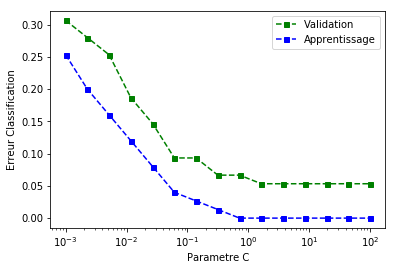

In [198]:
from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, Y = iris.data, iris.target

# Decoupage des donnees en jeu d'apprentissage et de validation
# Remarque : la normalisation des donnees est omise dans ce exemple

Xa, Xv, Ya, Yv = train_test_split(X, Y, shuffle=True, test_size=1/2, stratify=Y)


# Selection de l'hyper-parametre C 

clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')

vectC = np.logspace(-3, 2, 15)
err_app = np.empty(vectC.shape[0])
err_val = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_reglog.C = C
    clf_reglog.fit(Xa, Ya)
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_reglog.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_reglog.predict(Xa))

# Choix du meilleur C
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]


#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, err_val, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')

#%% ##### Model final
clf_reglog.C = Copt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(Copt ))
print('Err validation correspondante = {}'.format(100*(1 - accuracy_score(Yv, clf_reglog.predict(Xv)))))
print('Err apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

&nbsp;

<p style="text-align:justify;"> Graphiquement, on retrouve la valeur du C optimal qui corresspond au point où la coubre de validation (en vert) est minimal.</p>

&nbsp;

&nbsp;

# 2.2 Régression logistique sur problème de classification binaire

&nbsp;

<p style="text-align:justify;">Dans cette partie nous allons utiliser le même data set que dans la partie 1.2 avec le data set CTGSimple.</p>

In [173]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV", "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values

#Fusion des classes 2 et 3
classe = 3
Y[np.in1d(Y, classe)] = 2


# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.3, stratify=Y)

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)


&nbsp;

<p style="text-align:justify;"> Nous allons maintenant mettre en oeuvre la méthode de régression logistique. Pour ce faire, nous allons utiliser la méthode K folds comme vu dans le TP 1. Nous allons reprendre le même algorithme en l'adaptant à notre problème. Nous prendrons $k=3$ comme paramètre de k folds. </p>


&nbsp;

In [174]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
i = 1

vectC = np.logspace(-3, 2, 15)

perf_val = [[], [], []]
decoupage = 0

for train , valid in kf.split(Xa):
    X_train = Xa[train,:]
    Y_train = Ya[train]
    X_valid = Xa[valid,:]
    Y_valid = Ya[valid]
    
    for c in vectC :
        clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
        clf_reglog.C = c
        clf_reglog.fit(X_train, Y_train)
        perf_val[decoupage].append(1 - accuracy_score(Y_valid, clf_reglog.predict(X_valid)))
    decoupage += 1
    
perf_globale = np.zeros((len(vectC), 1))
for i in range(0, len(vectC)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale[i] /= 3
c_opt = vectC[np.argmin(perf_globale)]
print('Le C optimal est %.3f. ' %c_opt)

Le C optimal est 0.061. 


In [175]:
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
clf_reglog.C = c_opt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(c_opt ))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))
print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

Valeur de Copt = 0.0610540229658533
Err classification en test correspondante = 8.777429467084641
Err classification en apprentissage correspondante = 9.029779058597498



&nbsp;

<p style="text-align:justify;"> Nous obtenons ainsi de meilleurs résultats en test que pour la LDA et la QDA puisque nous avions obtenu les résultats suivants : </p>

* LDA : taux derreur apprentissage = 10.818438381937911%
* LDA : taux derreur test= 10.630291627469427%

* QDA : taux derreur apprentissage = 18.438381937911572%
* QDA : taux derreur test = 18.532455315145814%



&nbsp;

<p style="text-align:justify;"> Affichons maintenant la matrice de confusion : </p>

Text(0,0.5,'Vrai label')

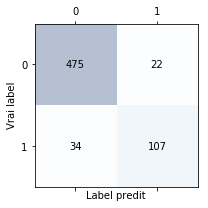

In [176]:
from sklearn.metrics import confusion_matrix

# Ici on suppose que le modele de regression logistique est nomme clf_reglog dans le code
# prediction des labels des donnees de test
ypred_test = clf_reglog.predict(Xt)

# matrice de confusion
confmat = confusion_matrix(y_true=Yt, y_pred=ypred_test)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
plt.xlabel("Label predit")
plt.ylabel("Vrai label")


&nbsp;

<p style="text-align:justify;"> Le modèle a classé 34 individus comme positif alors qu'ils sont négatifs et 22 individus comme négatifs alors qu'ils sont positifs..</p>

&nbsp;

&nbsp;

# 2.3 Cas multi-classe : données Mnist

&nbsp;

<p style="text-align:justify;">Dans cette partie nous allons utiliser le même data set que dans la partie 1.3 avec le data set Mnist.</p>

&nbsp;

<p style="text-align:justify;">Comme pour la partie 1.3, nous filtrons les variables dont la variance est faible (inférieure à 0.001).</p>

&nbsp;

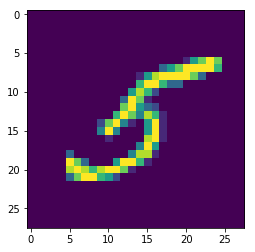

In [207]:
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

plt.imshow(Xa[35].reshape(28,28))

tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

In [179]:
kf = KFold(n_splits=10)
i = 1

vectC = [0.0001,  0.001,  0.01,  0.1, 1, 100, 1000, 10000]

perf_val = [[], [], [], [], [], [], [], [], [] ,[]]
decoupage = 0

for train , valid in kf.split(Xa):
    X_train = Xa[train,:]
    Y_train = Ya[train]
    X_valid = Xa[valid,:]
    Y_valid = Ya[valid]
    
    for c in vectC :
        clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
        clf_reglog.C = c
        clf_reglog.fit(X_train, Y_train)
        perf_val[decoupage].append(1 - accuracy_score(Y_valid, clf_reglog.predict(X_valid)))
    decoupage += 1
    
perf_globale = np.zeros((len(vectC), 1))
for i in range(0, len(vectC)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i] + perf_val[3][i] + perf_val[4][i] + perf_val[5][i] + perf_val[6][i] + perf_val[7][i] + perf_val[8][i] + perf_val[9][i] 
    perf_globale[i] /= 10
c_opt = vectC[np.argmin(perf_globale)]
print('Le C optimal est %.4f. ' %c_opt)

Le C optimal est 0.0023. 


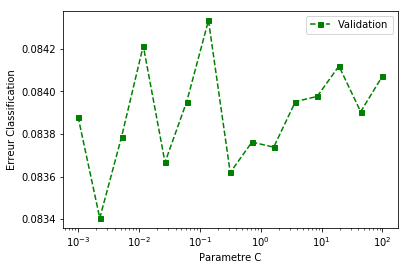

In [186]:
#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, perf_globale, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
#plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')

In [181]:
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
clf_reglog.C = c_opt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(c_opt ))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))
print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

Valeur de Copt = 0.0022758459260747888
Err classification en test correspondante = 7.920000000000005
Err classification en apprentissage correspondante = 6.338095238095242


&nbsp;

<p style="text-align:justify;"> Nous avions obtenu avec la méthode LDA un score de classification en test de 12.70% de taux d'erreur. Nous trouvons ici 7.9%. La méthode de regression logistique est donc plus performante que la méthode LDA pour ce problème.</p>

&nbsp;

<p style="text-align:justify;"> Nous allons maintenant déclarer un nouveau modèle pour la régression logistique en changeant les paramètres de la fonction *LogisticRegression* de *Scikit-Learn*. Nous prenons "multi_class = ovr" et "solver = liblinear". "multi_class = ovr" va permette d'ajuster pour chaque label un problème binaire. "solver = liblinear" permet une régularisation L1.</p>

&nbsp;

In [210]:
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='ovr', solver='liblinear')
clf_reglog.C = 0.0022758459260747888
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(c_opt ))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))
print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

Valeur de Copt = 0.0022758459260747888
Err classification en test correspondante = 8.469999999999999
Err classification en apprentissage correspondante = 6.740476190476185


&nbsp;

<p style="text-align:justify;"> Sans même faire une recherche d'hyper paramètre optimal, on peut voir que les performances du modèle ne se détériorent pas. J'ai voulu lancer une recherche optimal d'hyper paramètre, mais le temps de calcul est trop long.</p>

&nbsp;